In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [29]:
from src.data_loader import ViTDataLoader
from src.vit_train import ViTTrainer, load_model_dir, load_model_config
import importlib
from src.vit_data import load_cd_data_24x128

config_name = '24x_120_replicates'
config = importlib.import_module(f"config.{config_name}")
vit = load_model_config(config)
vit_data = load_cd_data_24x128(config.REPLICATE_MODE)

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader)

channels
Split: time,120.0; Training: 19921; Validation: 2214; Testing: 4427


In [30]:
dataloader.dataset.all_imgs.shape

torch.Size([26562, 2, 24, 128])

In [90]:
device = trainer.device
vit = trainer.vit

In [91]:
trainer.setup()

Creating directory: output/complex_24x128_120_20220531_025b...


In [92]:
vit.load_state_dict(torch.load('output/complex_24x128_120_20220526_cf53/model.torch', 
                               map_location=torch.device('cpu')))

<All keys matched successfully>

In [32]:
trainer.compute_predictions_losses()

In [33]:
print(trainer.perf_str)

Loss:
  Train:	1.024
  Valid:	1.052
  Test: 	0.937

R2:
  Train:	-0.012
  Valid:	-0.012
  Test: 	-0.015


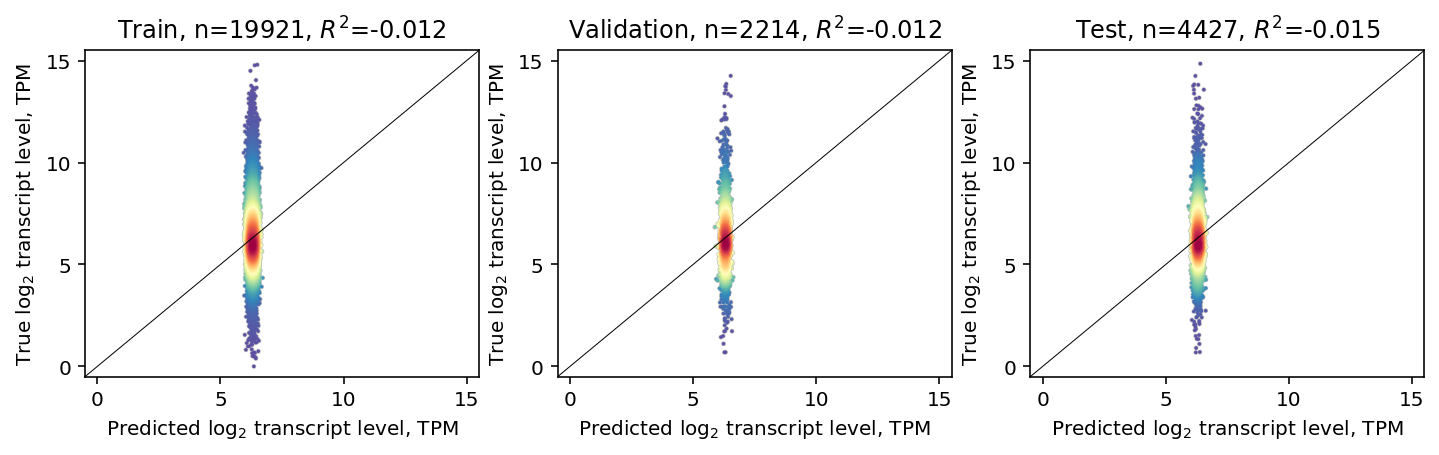

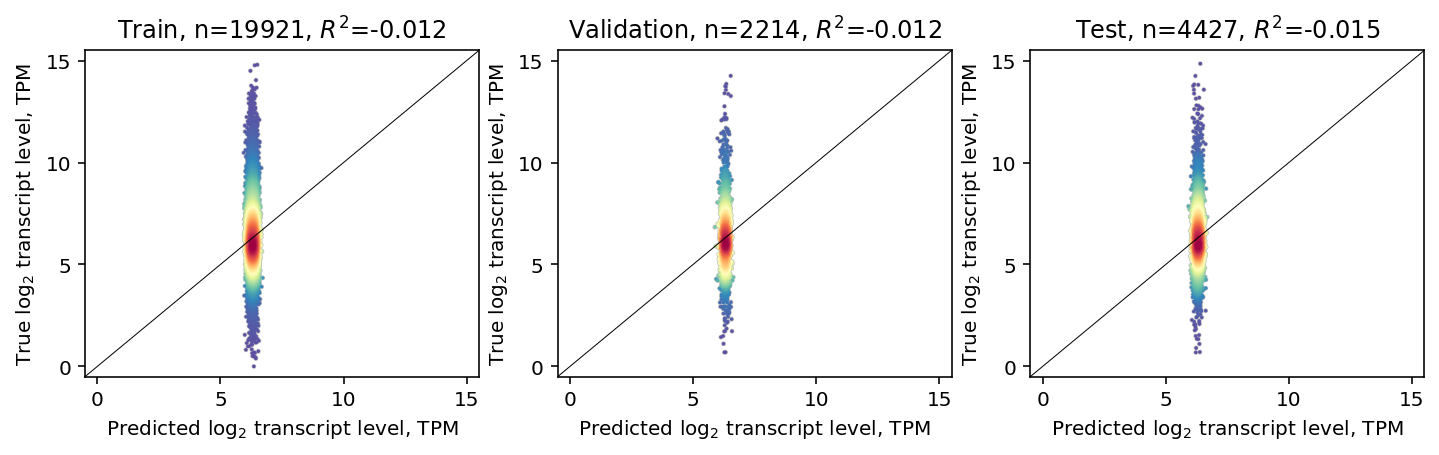

In [34]:
trainer.plot_predictions()

In [96]:
from src.rna_plotter import load_rna_plotter
from src.orf_plotter import ORFAnnotationPlotter

orf_plotter = ORFAnnotationPlotter()
rna_plotter = load_rna_plotter()


0

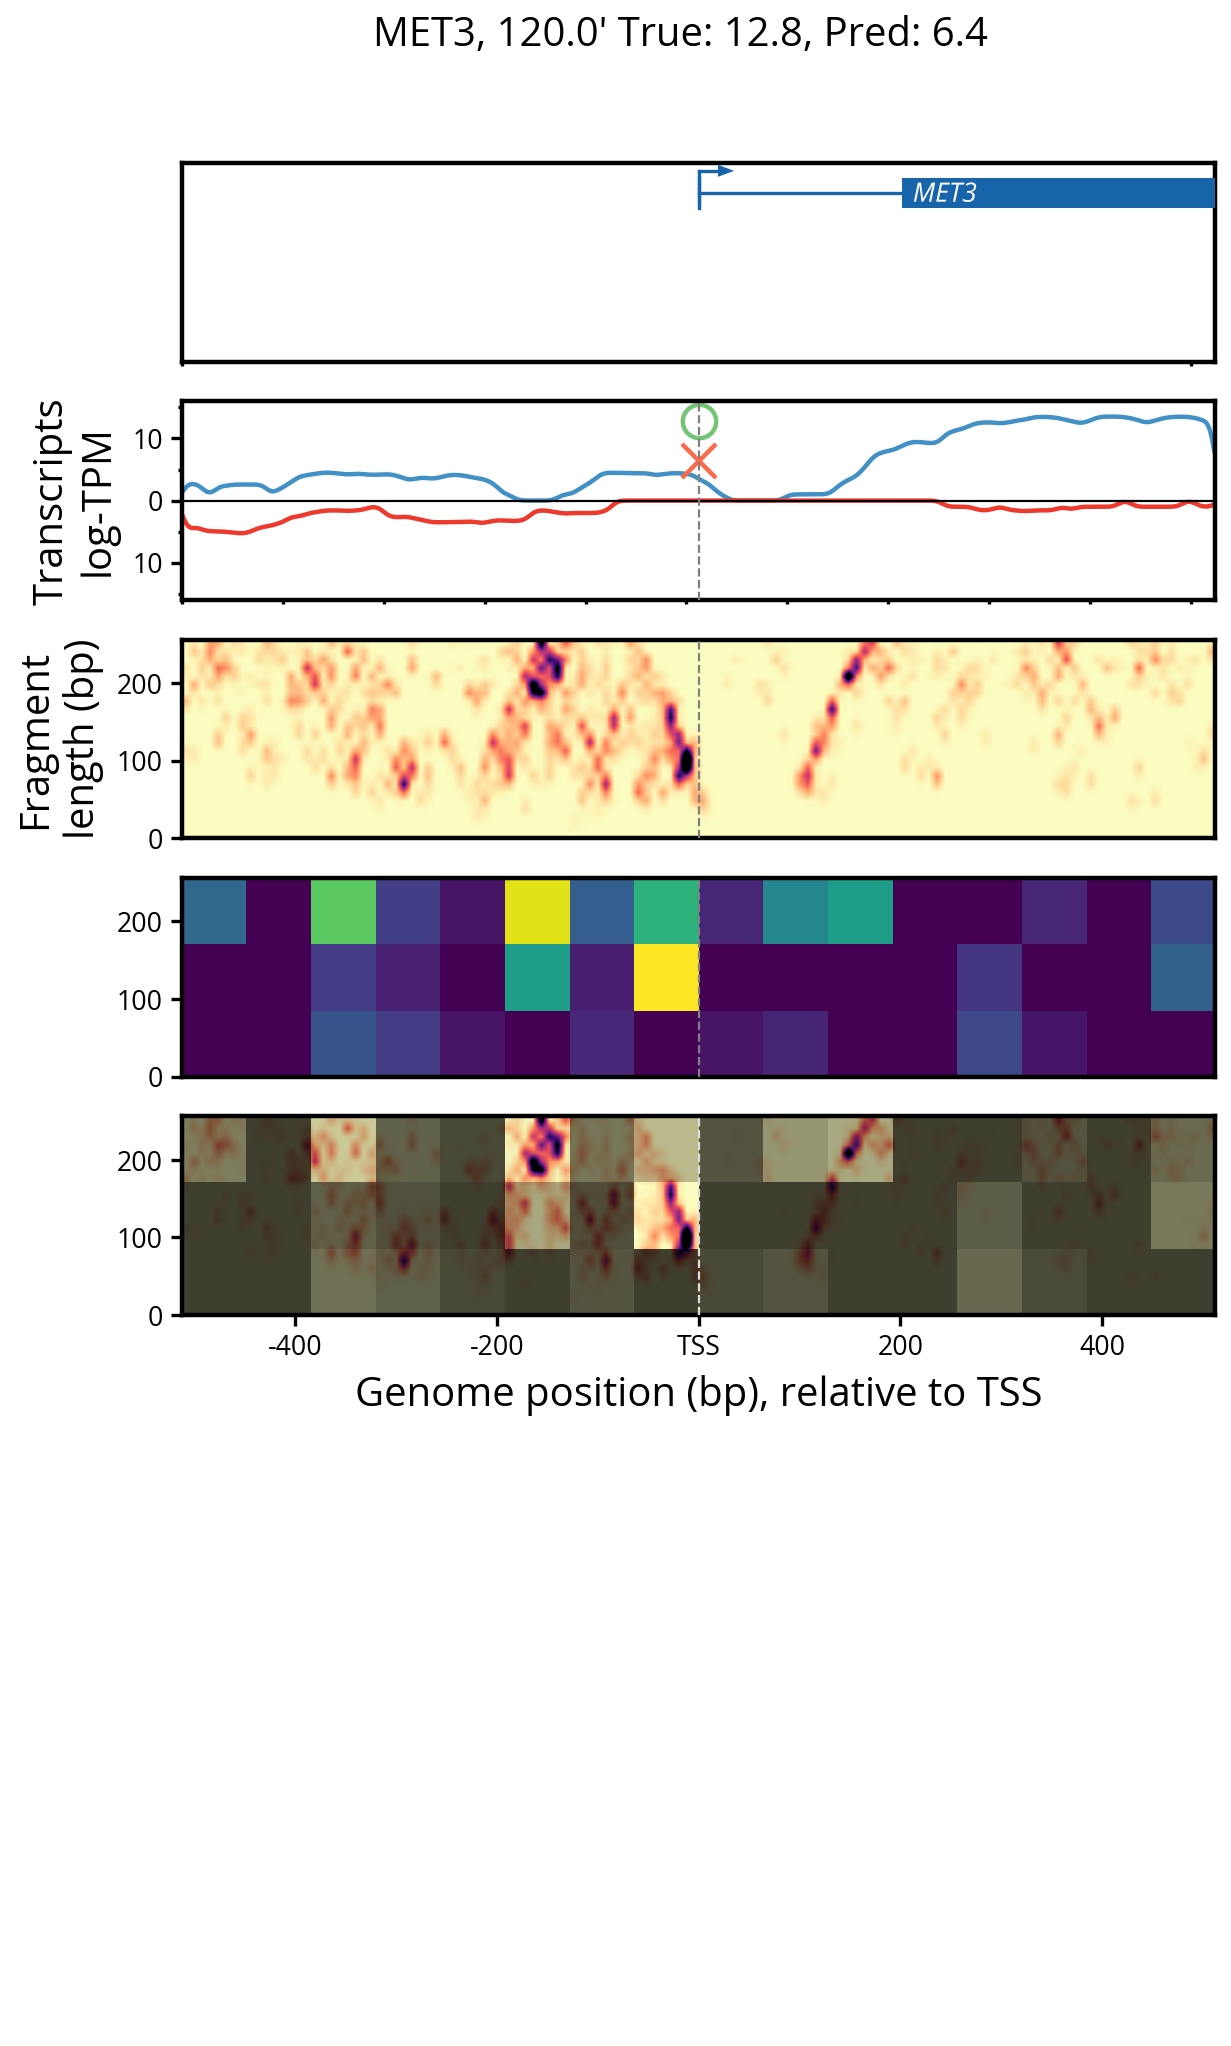

In [97]:
from src.vit_viz import plot_gene_prediction

plot_gene_prediction('MET3', 120.0, trainer.vit, trainer.dataloader.dataset,
    orf_plotter=orf_plotter, rna_plotter=rna_plotter)
0

In [87]:
from src.vit_data import load_cd_data_24x128

vit_data  = load_cd_data_24x128()

In [99]:
loss_df = pd.read_csv('output/complex_24x128_120_20220526_cf53/loss.csv')
loss_df.head()

,epoch,train_loss,validation_loss,debug_train,debug_valid,debug_test
0,10,1.020483,0.981446,1.018902,0.981318,0.925112
1,20,1.019321,0.981310,1.018632,0.981499,0.924843
2,30,1.018875,0.981141,1.018613,0.981477,0.924664
3,40,1.018471,0.981221,1.018572,0.981402,0.924801
4,50,1.018231,0.981416,1.018716,0.981446,0.924941


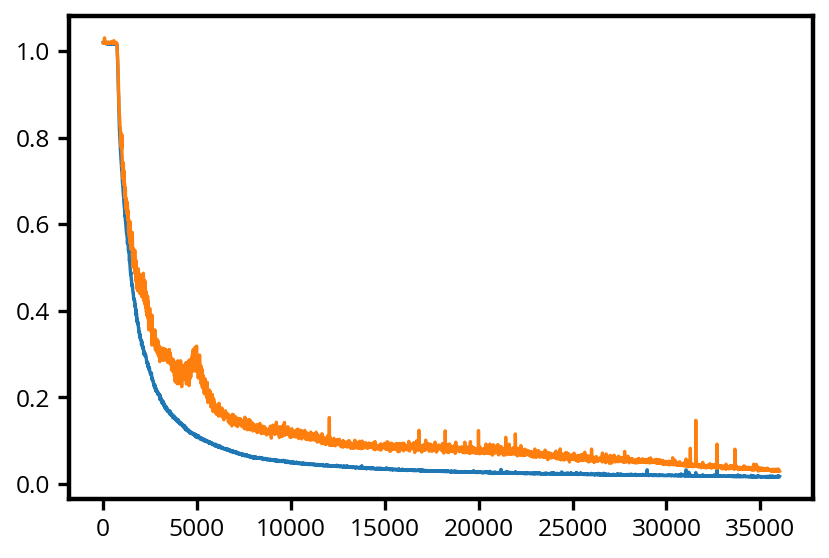

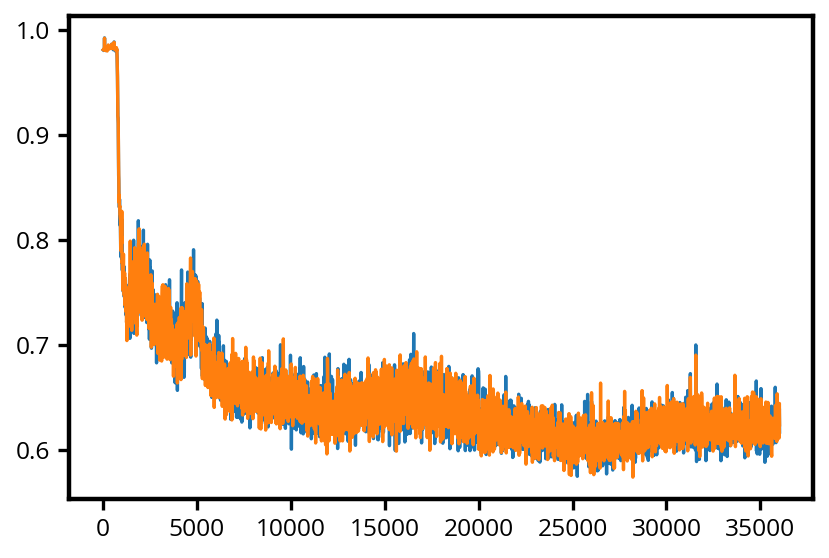

In [102]:
plt.plot(loss_df.epoch, loss_df.train_loss)
plt.plot(loss_df.epoch, loss_df.debug_train)
plt.show()

plt.plot(loss_df.epoch, loss_df.debug_valid)
plt.plot(loss_df.epoch, loss_df.validation_loss)

In [44]:
trainer.dataloader.dataset.all_imgs.dim(), trainer.dataloader.dataset.all_imgs.shape

(4, torch.Size([26562, 2, 24, 128]))

In [47]:
trainer.dataloader.dataset.all_imgs.numpy().ndim

4